<a href="https://colab.research.google.com/github/Maysk/data_science_alura/blob/main/deep_learning_parte_2/classificacao_roupas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [1]:
import tensorflow
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt


#Carregar Dataset

In [2]:
dataset = keras.datasets.fashion_mnist

# Explorar os Dados

In [3]:
((imagens_treino, id_treino), (imagens_teste, id_teste)) = dataset.load_data();

In [4]:
nomes_de_classificacoes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

numero_de_classificacoes = len(np.unique(id_treino))

#Exibir os dados

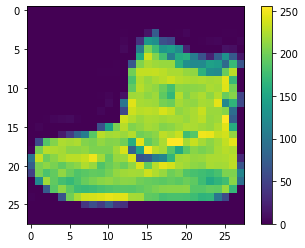

In [5]:
# for imagem in range(10):
#   plt.subplot(2, 5, imagem+1)
#   plt.imshow(imagens_treino[imagem])
#   plt.title(nomes_de_classificacoes[id_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

# Modelo
- Criando, compilando e treinando o modelo
- Modelo foi normalizado e uma camada dropout foi utilizada (0.2)

In [6]:
#normalizacao
imagens_treino_modificada = imagens_treino / float(255)

#entrada
layer_0 = keras.layers.Flatten(input_shape=(28,28))

#processamento
layer_hidden = [
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
  keras.layers.Dense(32, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
]

#saida
layer_n = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

#Modelo com duas camadas
modelo = keras.Sequential([layer_0, *layer_hidden, layer_n])


modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',])

In [7]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,802
Trainable params: 13,802
Non-traina

In [8]:
historico = modelo.fit(imagens_treino_modificada, id_treino, verbose=1, epochs=5, steps_per_epoch=3000, validation_split=0.2)

Epoch 1/5
3000/3000 [==============================] - 13s 4ms/step - loss: 0.6898 - accuracy: 0.7533 - val_loss: 0.4667 - val_accuracy: 0.8381
Epoch 2/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4848 - accuracy: 0.8289 - val_loss: 0.4207 - val_accuracy: 0.8453
Epoch 3/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4418 - accuracy: 0.8431 - val_loss: 0.4152 - val_accuracy: 0.8497
Epoch 4/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4205 - accuracy: 0.8498 - val_loss: 0.3968 - val_accuracy: 0.8587
Epoch 5/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4054 - accuracy: 0.8563 - val_loss: 0.4036 - val_accuracy: 0.8551


##Visualizando as acurácias de treino e validação por época

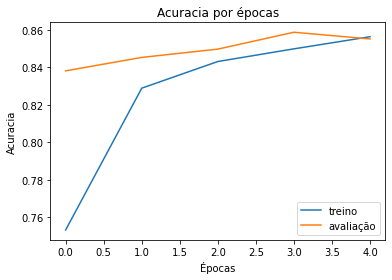

In [9]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acuracia por épocas")
plt.xlabel("Épocas")
plt.ylabel("Acuracia")
plt.legend(["treino","avaliação"])

##Visualizando as perdas de treino e validação por época

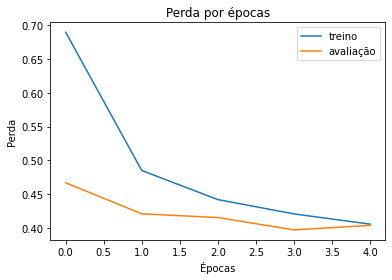

In [10]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por épocas")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend(["treino","avaliação"])

##Salvando e carregando o modelo treinado

In [11]:
modelo.save('modelo.h5')
modelo_salvo = tensorflow.keras.models.load_model('modelo.h5')

##Avaliando o modelo

In [12]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, id_teste, steps=50)

50/50 [==============================] - 0s 3ms/step - loss: 74.7617 - accuracy: 0.7791


In [13]:
perda_teste, acuracia_teste = modelo_salvo.evaluate(imagens_teste, id_teste, steps=50)

50/50 [==============================] - 0s 2ms/step - loss: 74.7617 - accuracy: 0.7791


# Entendendo o que foi feito

In [14]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,802
Trainable params: 13,802
Non-traina

---
**O valor no params não é magia. Ele é output_size * (input_size + 1) == number_parameters.**

**Cada camada tem um bias (Por isso o input_size+1).**

Link: 
- https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks
- https://stackoverflow.com/questions/36946671/keras-model-summary-result-understanding-the-of-parameters
---

In [15]:
pesos_da_camada_dense_0 = modelo.layers[1].get_weights()[0]
vieses_da_camada_dense_0 = modelo.layers[1].get_weights()[1]
print(f"Shape pesos:{pesos_da_camada_dense_0.shape}")
print(f"Shape vieses:{vieses_da_camada_dense_0.shape}")

Shape pesos:(784, 16)
Shape vieses:(16,)


In [27]:
'''
 # Pode matar a rede  
 pesos_da_camada_dense_0_zerados = np.zeros(pesos_da_camada_dense_0.shape)
 vieses_da_camada_dense_0_zerados = np.zeros(vieses_da_camada_dense_0.shape)
 modelo.layers[1].set_weights([pesos_da_camada_dense_0_zerados, vieses_da_camada_dense_0_zerados ])
'''

# Pode ocorrer vanish gradients 
pesos_da_camada_dense_0_aleatorios = np.random.rand(*pesos_da_camada_dense_0.shape)
vieses_da_camada_dense_0_zerados = np.zeros(vieses_da_camada_dense_0.shape)
modelo.layers[1].set_weights([pesos_da_camada_dense_0_aleatorios, vieses_da_camada_dense_0_zerados])


In [28]:
#normalizacao
imagens_treino_modificada = imagens_treino / float(255)

#entrada
layer_0 = keras.layers.Flatten(input_shape=(28,28))

#processamento
layer_hidden = [
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
  keras.layers.Dense(32, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
]

#saida
layer_n = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

#Modelo com duas camadas
modelo = keras.Sequential([layer_0, *layer_hidden, layer_n])


modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',])

In [29]:
historico = modelo.fit(imagens_treino_modificada, id_treino, verbose=1, epochs=5, steps_per_epoch=3000, validation_split=0.2)

Epoch 1/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.7127 - accuracy: 0.7439 - val_loss: 0.4923 - val_accuracy: 0.8242
Epoch 2/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4850 - accuracy: 0.8307 - val_loss: 0.4584 - val_accuracy: 0.8317
Epoch 3/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4427 - accuracy: 0.8440 - val_loss: 0.4153 - val_accuracy: 0.8501
Epoch 4/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4213 - accuracy: 0.8478 - val_loss: 0.4238 - val_accuracy: 0.8471
Epoch 5/5
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4108 - accuracy: 0.8516 - val_loss: 0.4237 - val_accuracy: 0.8439


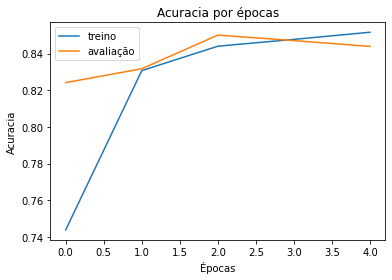

In [30]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acuracia por épocas")
plt.xlabel("Épocas")
plt.ylabel("Acuracia")
plt.legend(["treino","avaliação"])

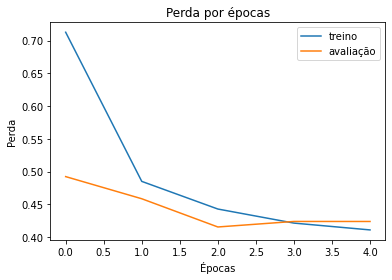

In [31]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por épocas")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend(["treino","avaliação"])

# Configuracoes da Rede

In [32]:
modelo.get_config()
# GlorotUniform -> Utilizado para inicializar

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_2_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_2',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_8',
    'trainable': True,
    'units': 16,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_ini